In [2]:
import pandas as pd

dic = pd.read_csv("DataDictionaryWiDS2021.csv")

#Data Curation/Cleaning part
#for each category do an "eda", check distribution, frequency etc.. and then do the data cleaning 

In [26]:
#creating a new dataframe with just the category 'vitals'
vitals = dic.loc[dic['Category'] == 'vitals'].copy()

In [27]:
#showing off our new dataframe
vitals.head()

Category              Variable Name         Unit of Measure Data Type  \
45   vitals     d1_diasbp_invasive_max  Millimetres of mercury   numeric   
46   vitals     d1_diasbp_invasive_min  Millimetres of mercury   numeric   
47   vitals              d1_diasbp_max  Millimetres of mercury   numeric   
48   vitals              d1_diasbp_min  Millimetres of mercury   numeric   
49   vitals  d1_diasbp_noninvasive_max  Millimetres of mercury   numeric   

                                          Description Example  
45  The patient's highest diastolic blood pressure...      60  
46  The patient's lowest diastolic blood pressure ...      60  
47  The patient's highest diastolic blood pressure...      60  
48  The patient's lowest diastolic blood pressure ...      60  
49  The patient's highest diastolic blood pressure...      60

In [28]:
#showing off our new dataframe
vitals.head()

Category              Variable Name         Unit of Measure Data Type  \
45   vitals     d1_diasbp_invasive_max  Millimetres of mercury   numeric   
46   vitals     d1_diasbp_invasive_min  Millimetres of mercury   numeric   
47   vitals              d1_diasbp_max  Millimetres of mercury   numeric   
48   vitals              d1_diasbp_min  Millimetres of mercury   numeric   
49   vitals  d1_diasbp_noninvasive_max  Millimetres of mercury   numeric   

                                          Description Example  
45  The patient's highest diastolic blood pressure...      60  
46  The patient's lowest diastolic blood pressure ...      60  
47  The patient's highest diastolic blood pressure...      60  
48  The patient's lowest diastolic blood pressure ...      60  
49  The patient's highest diastolic blood pressure...      60

In [29]:
#checking some info
vitals.describe()

Category    Variable Name         Unit of Measure Data Type  \
count        52               52                      52        52   
unique        1               52                       5         1   
top      vitals  d1_resprate_max  Millimetres of mercury   numeric   
freq         52                1                      36        52   

                                              Description Example  
count                                                  52      52  
unique                                                 52       8  
top     The patient's lowest diastolic blood pressure ...      80  
freq                                                    1      12

In [43]:
vitals.tail(5)

Category             Variable_Name         Unit_of_Measure Data Type  \
92   vitals              h1_sysbp_min  Millimetres of mercury   numeric   
93   vitals  h1_sysbp_noninvasive_max  Millimetres of mercury   numeric   
94   vitals  h1_sysbp_noninvasive_min  Millimetres of mercury   numeric   
95   vitals               h1_temp_max         Degrees Celsius   numeric   
96   vitals               h1_temp_min         Degrees Celsius   numeric   

                                          Description Example  \
92  The patient's lowest systolic blood pressure d...     120   
93  The patient's highest systolic blood pressure ...     120   
94  The patient's lowest systolic blood pressure d...     120   
95  The patient's highest core temperature during ...      33   
96  The patient's lowest core temperature during t...      33   

    Millimetres of mercury  Degrees Celsius  Beats per minute  Percentage  \
92                    True            False             False       False   
93                    True            False             False       False   
94                    True            False             False       False   
95                   False             True             False       False   
96                   False             True             False       False   

    ...  lowest core temperature  highest systolic blood pressure  \
92  ...                    False                            False   
93  ...                    False                             True   
94  ...                    False                            False   
95  ...                    False                            False   
96  ...                     True                            False   

    lowest systolic blood pressure  highest heart rate  lowest heart rate  \
92                            True               False              False   
93                           False               False              False   
94                            True               False              False   
95                           False               False              False   
96                           False               False              False   

    highest peripheral oxygen saturation  lowest peripheral oxygen saturation  \
92                                 False                                False   
93                                 False                                False   
94                                 False                                False   
95                                 False                                False   
96                                 False                                False   

    invasively  non-invasively  either non-invasively or invasively measured  
92        True            True                                          True  
93        True            True                                         False  
94        True            True                                         False  
95        True           False                                         False  
96       False           False                                         False  

[5 rows x 28 columns]

In [31]:
vitals.rename(columns={'Unit of Measure': 'Unit_of_Measure'}, inplace = True)

In [32]:
vitals.rename(columns={'Variable Name': 'Variable_Name'}, inplace = True)

In [33]:
#creating tons of new variables for our model, one for each of the labels defined about the Unit of Measure
vitals['Millimetres of mercury']= vitals.Unit_of_Measure.str.contains("Millimetres of mercury")
vitals['Degrees Celsius']= vitals.Unit_of_Measure.str.contains("Degrees Celsius")
vitals['Beats per minute']= vitals.Unit_of_Measure.str.contains("Beats per minute")
vitals['Percentage']= vitals.Unit_of_Measure.str.contains("Percentage")
vitals['Breaths per minute ']= vitals.Unit_of_Measure.str.contains("Breaths per minute")

In [34]:
#labels that can be attributed to the patient in the fist 24 hours of their stay in the hospital, there are
#two types: measurements and invasion type

#MEASUREMENTS
#highest mean blood pressure
#lowest mean blood pressure
#highest respiratory rate
#lowest respiratory rate
#highest diastolic blood pressure
#lowest  diastolic blood pressure
#highest core temperature
#lowest core temperature
#highest systolic blood pressure
#lowest systolic blood pressure
#highest heart rate
#lowest heart rate
#highest peripheral oxygen saturation
#lowest peripheral oxygen saturation

#INVASION
#invasively
#non-invasively
#either non-invasively or invasively measured

#creating tons of new variables for our model, one for each of the labels defined about the measurements taken 
#and they invasion type

vitals['highest mean blood pressure']= vitals.Description.str.contains("highest mean blood pressure")
vitals['lowest mean blood pressure']= vitals.Description.str.contains("lowest mean blood pressure")
vitals['highest respiratory rate']= vitals.Description.str.contains("highest respiratory rate")
vitals['lowest respiratory rate']= vitals.Description.str.contains("lowest respiratory rate")
vitals['highest diastolic blood pressure']= vitals.Description.str.contains("highest diastolic blood pressure")
vitals['lowest diastolic blood pressure']= vitals.Description.str.contains("lowest diastolic blood pressure")
vitals['highest core temperature']= vitals.Description.str.contains("highest core temperature")
vitals['lowest core temperature']= vitals.Description.str.contains("lowest core temperature")
vitals['highest systolic blood pressure']= vitals.Description.str.contains("highest systolic blood pressure")
vitals['lowest systolic blood pressure']= vitals.Description.str.contains("lowest systolic blood pressure")
vitals['highest heart rate']= vitals.Description.str.contains("highest heart rate")
vitals['lowest heart rate']= vitals.Description.str.contains("lowest heart rate")
vitals['highest peripheral oxygen saturation']= vitals.Description.str.contains("highest peripheral oxygen saturation")
vitals['lowest peripheral oxygen saturation']= vitals.Description.str.contains("lowest peripheral oxygen saturation")
vitals['invasively']= vitals.Description.str.contains("invasively")
vitals['non-invasively']= vitals.Description.str.contains("non-invasively")
vitals['either non-invasively or invasively measured']= vitals.Description.str.contains("either")

In [35]:
vitals.corr()

Millimetres of mercury  \
Millimetres of mercury                                      1.000000   
Degrees Celsius                                            -0.433013   
Beats per minute                                           -0.433013   
Percentage                                                 -0.433013   
Breaths per minute                                         -0.433013   
highest mean blood pressure                                 0.240772   
lowest mean blood pressure                                  0.240772   
highest respiratory rate                                   -0.300000   
lowest respiratory rate                                    -0.300000   
highest diastolic blood pressure                            0.240772   
lowest diastolic blood pressure                             0.240772   
highest core temperature                                   -0.300000   
lowest core temperature                                    -0.300000   
highest systolic blood pressure                             0.240772   
lowest systolic blood pressure                              0.240772   
highest heart rate                                         -0.300000   
lowest heart rate                                          -0.300000   
highest peripheral oxygen saturation                       -0.300000   
lowest peripheral oxygen saturation                        -0.300000   
invasively                                                  0.910465   
non-invasively                                              0.617213   
either non-invasively or invasively measured                0.365148   

                                              Degrees Celsius  \
Millimetres of mercury                              -0.433013   
Degrees Celsius                                      1.000000   
Beats per minute                                    -0.083333   
Percentage                                          -0.083333   
Breaths per minute                                  -0.083333   
highest mean blood pressure                         -0.104257   
lowest mean blood pressure                          -0.104257   
highest respiratory rate                            -0.057735   
lowest respiratory rate                             -0.057735   
highest diastolic blood pressure                    -0.104257   
lowest diastolic blood pressure                     -0.104257   
highest core temperature                             0.692820   
lowest core temperature                              0.692820   
highest systolic blood pressure                     -0.104257   
lowest systolic blood pressure                      -0.104257   
highest heart rate                                  -0.057735   
lowest heart rate                                   -0.057735   
highest peripheral oxygen saturation                -0.057735   
lowest peripheral oxygen saturation                 -0.057735   
invasively                                          -0.150188   
non-invasively                                      -0.267261   
either non-invasively or invasively measured        -0.158114   

                                              Beats per minute  Percentage  \
Millimetres of mercury                               -0.433013   -0.433013   
Degrees Celsius                                      -0.083333   -0.083333   
Beats per minute                                      1.000000   -0.083333   
Percentage                                           -0.083333    1.000000   
Breaths per minute                                   -0.083333   -0.083333   
highest mean blood pressure                          -0.104257   -0.104257   
lowest mean blood pressure                           -0.104257   -0.104257   
highest respiratory rate                             -0.057735   -0.057735   
lowest respiratory rate                              -0.057735   -0.057735   
highest diastolic blood pressure                     -0.104257   -0.104257   
lowest diastolic blood pressure    

<AxesSubplot:>

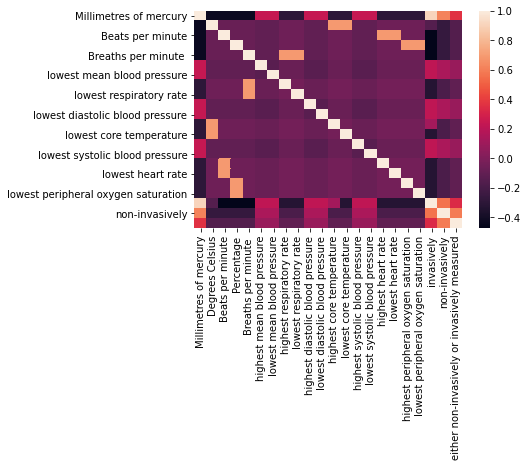

In [36]:
import seaborn as sns

sns.heatmap(vitals.corr())

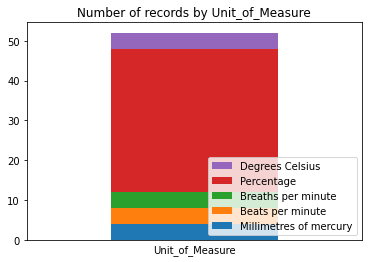

In [37]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
vitals.assign(dummy = 1).groupby(
  ['dummy','Unit_of_Measure']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by Unit_of_Measure')

# other it'll show up as 'dummy' 
plt.xlabel('Unit_of_Measure')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(vitals['Unit_of_Measure'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

In [38]:
# checking the average Millimetres of mercury found in patients
avgmercury = vitals.loc[vitals['Unit_of_Measure'] == 'Millimetres of mercury','Example'].mean()
avgdegrees = vitals.loc[vitals['Unit_of_Measure'] == 'Degrees Celsius', 'Example'].mean()
avgbeats = vitals.loc[vitals['Unit_of_Measure'] == 'Beats per minute', 'Example'].mean()

print('avgmercury:',avgmercury,'\n','avgdegrees:',avgdegrees,'\n', 'avgbeats:',avgbeats)

avgmercury: 1.6835016835022448e+82 
 avgdegrees: 8333333.25 
 avgbeats: 18939393.75


In [39]:
#how is it possible that the mean of examples for the Degrees Celcious Unit Measure is 8.333.333.
#No one is that hot